<a href="https://colab.research.google.com/github/javidhasanov/Covid-19----FbProphet/blob/main/Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

from prophet import Prophet
from sklearn.metrics import r2_score

# **Uploading** **data**

In [3]:
plt.style.use("ggplot")

df1 = pd.read_csv("CONVENIENT_global_confirmed_cases.csv")
df2 = pd.read_csv("CONVENIENT_global_deaths.csv")

In [4]:
df1.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df2.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Creating** **new** **table**

In [6]:
world = pd.DataFrame({"Countries":[],"Cases":[]})
world["Countries"] = df1.iloc[:,1:].columns
cases = []
for i in world["Countries"]:
    cases.append(pd.to_numeric(df1[i][1:]).sum())
world["Cases"]=cases

In [7]:
world

,Countries,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0
...,...,...
284,West Bank and Gaza,703228.0
285,Winter Olympics 2022,535.0
286,Yemen,11945.0
287,Zambia,343135.0


In [8]:
world.info

<bound method DataFrame.info of                 Countries     Cases
0             Afghanistan  209451.0
1                 Albania  334457.0
2                 Algeria  271496.0
3                 Andorra   47890.0
4                  Angola  105288.0
..                    ...       ...
284    West Bank and Gaza  703228.0
285  Winter Olympics 2022     535.0
286                 Yemen   11945.0
287                Zambia  343135.0
288              Zimbabwe  264276.0

[289 rows x 2 columns]>

# Eliminating unneeded symbols from rows such as (. & '(' )

In [9]:
country_list=list(world["Countries"].values)
dx = 0
for i in country_list:
    ac = 0
    for j in i:
        if j==".":
            i = i[:ac]
            country_list[dx]=i
        elif j=="(":
            i = i[:ac-1]
            country_list[dx]=i
        else:
            ac += 1
    dx += 1
world["Countries"]=country_list

world

,Countries,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0
...,...,...
284,West Bank and Gaza,703228.0
285,Winter Olympics 2022,535.0
286,Yemen,11945.0
287,Zambia,343135.0


# Removing repeated countries' names and summing

In [10]:
world = world.groupby("Countries")["Cases"].sum().reset_index()
world.head()

,Countries,Cases
0,Afghanistan,209451.0
1,Albania,334457.0
2,Algeria,271496.0
3,Andorra,47890.0
4,Angola,105288.0


# Uploading new file

In [11]:
continent=pd.read_csv("continents2.csv")
continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [12]:
continent["name"]=continent["name"].str.upper()
continent

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,AFGHANISTAN,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,ÅLAND ISLANDS,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,ALBANIA,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,ALGERIA,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,AMERICAN SAMOA,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
244,WALLIS AND FUTUNA,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,NaN,9.0,61.0,NaN
245,WESTERN SAHARA,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,NaN,2.0,15.0,NaN
246,YEMEN,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,NaN,142.0,145.0,NaN
247,ZAMBIA,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Sub-Saharan Africa,Eastern Africa,2.0,202.0,14.0


# Creating bins for cases

In [13]:
world["Ranged cases"]=pd.cut(world["Cases"],[-150000,50000,200000,800000,1500000,15000000],
                            labels=["UpTo50K","50Kto200K","200Kto800K","800Kto1.5M","1.5M+"])

# Adding alpha3 from continent to world table

In [14]:
alpha3 =[]
for i in world["Countries"].str.upper().values:
    if i == "BRUNEI":
        i="BRUNEI DARUSSALAM"
    elif  i=="US":
        i="UNITED STATES"
    if len(continent[continent["name"]==i]["alpha-3"].values)==0:
        alpha3.append(np.nan)
    else:
        alpha3.append(continent[continent["name"]==i]["alpha-3"].values[0])
world["Alpha3"]=alpha3

In [15]:
# Removing Antractica for the sake of better visualization
world = world.drop(index= 5)

In [16]:
world

,Countries,Cases,Ranged cases,Alpha3
0,Afghanistan,209451.0,200Kto800K,AFG
1,Albania,334457.0,200Kto800K,ALB
2,Algeria,271496.0,200Kto800K,DZA
3,Andorra,47890.0,UpTo50K,AND
4,Angola,105288.0,50Kto200K,AGO
...,...,...,...,...
195,West Bank and Gaza,703228.0,200Kto800K,NaN
196,Winter Olympics 2022,535.0,UpTo50K,NaN
197,Yemen,11945.0,UpTo50K,YEM
198,Zambia,343135.0,200Kto800K,ZMB


In [17]:
fig = px.choropleth(world.dropna(),
                   locations="Alpha3",
                   color="Ranged cases",
                    projection="natural earth",
                    hover_data= "Cases")
                    #color_discrete_sequence=["white","khaki","yellow","orange","red"])
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Counting total cases and deaths for each day

In [18]:
count = []
for i in range(1,len(df1)):
    count.append(sum(pd.to_numeric(df1.iloc[i,1:].values)))

In [19]:
df = pd.DataFrame()
df["Date"] = df1["Country/Region"][1:]
df["Cases"] = count
df=df.set_index("Date")

In [20]:
deathCount = []
for i in range(1,len(df2)):
    deathCount.append(sum(pd.to_numeric(df2.iloc[i,1:].values)))

df["Deaths"] = deathCount

In [21]:
df

,Cases,Deaths
Date,,
1/23/20,100.0,1.0
1/24/20,287.0,8.0
1/25/20,493.0,16.0
1/26/20,683.0,14.0
1/27/20,809.0,26.0
...,...,...
3/5/23,56126.0,148.0
3/6/23,58040.0,366.0
3/7/23,130437.0,923.0


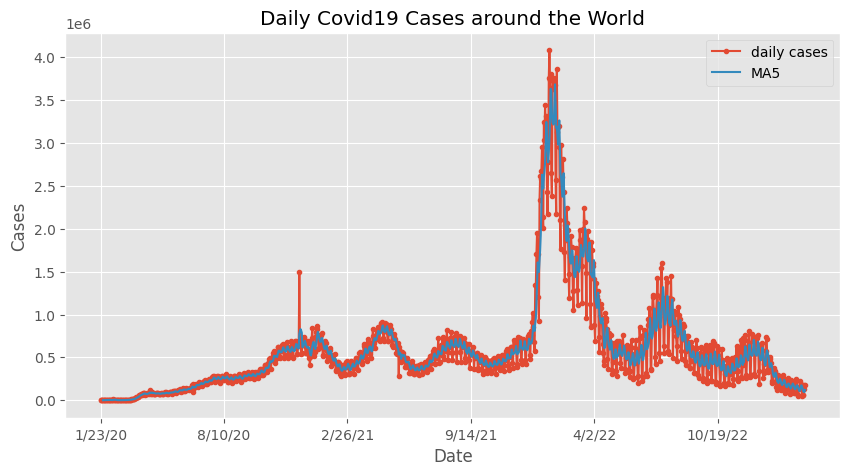

In [22]:
df.Cases.plot(title="Daily Covid19 Cases around the World",marker=".",figsize=(12,6),label="daily cases")
df.Cases.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Cases")
plt.legend()
plt.show()

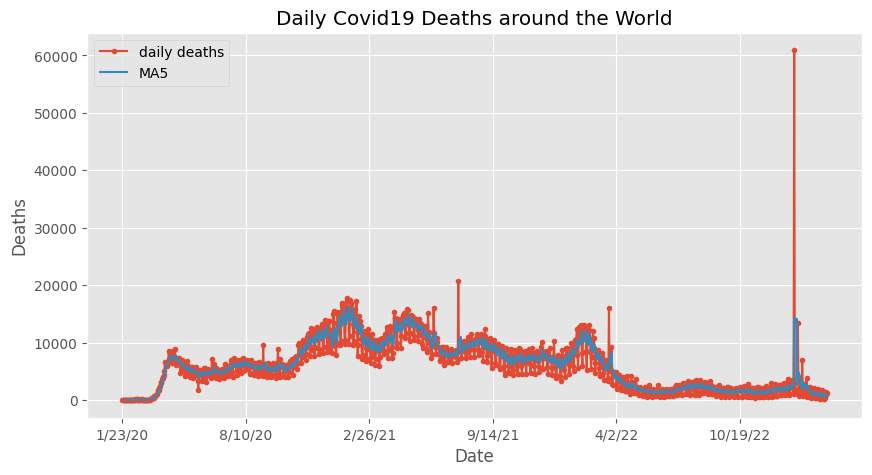

In [23]:
df.Deaths.plot(title="Daily Covid19 Deaths around the World",marker=".",figsize=(10,5),label="daily deaths")
df.Deaths.rolling(window=5).mean().plot(figsize=(10,5),label="MA5")
plt.ylabel("Deaths")
plt.legend()
plt.show()

# Using Fbprophet for forecasting

In [24]:
class Fbprophet(object):
    def fit(self,data):

        self.data  = data
        self.model = Prophet(weekly_seasonality=True,daily_seasonality=False,yearly_seasonality=False)
        self.model.fit(self.data)

    def forecast(self,periods,freq):

        self.future = self.model.make_future_dataframe(periods=periods,freq=freq)
        self.df_forecast = self.model.predict(self.future)

    def plot(self,xlabel="Years",ylabel="Values"):

        self.model.plot(self.df_forecast,xlabel=xlabel,ylabel=ylabel,figsize=(9,4))
        self.model.plot_components(self.df_forecast,figsize=(9,6))

    def R2(self):
        return r2_score(self.data.y, self.df_forecast.yhat[:len(df)])

In [25]:
#creating new df for forecasting since fbprophet should have ds and y columns
df_fb  = pd.DataFrame({"ds":[],"y":[]})
df_fb["ds"] = pd.to_datetime(df.index)
df_fb["y"]  = df.iloc[:,0].values

In [26]:
df_fb

,ds,y
0,2020-01-23,100.0
1,2020-01-24,287.0
2,2020-01-25,493.0
3,2020-01-26,683.0
4,2020-01-27,809.0
...,...,...
1137,2023-03-05,56126.0
1138,2023-03-06,58040.0
1139,2023-03-07,130437.0
1140,2023-03-08,179446.0


In [27]:
#feeding model with data
model = Fbprophet()
model.fit(df_fb)
model.forecast(30,"D")
model.R2

DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_fejnqv/_ku_c6lb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb_fejnqv/nkyciig3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5248', 'data', 'file=/tmp/tmpb_fejnqv/_ku_c6lb.json', 'init=/tmp/tmpb_fejnqv/nkyciig3.json', 'output', 'file=/tmp/tmpb_fejnqv/prophet_modeleo71ch5f/prophet_model-20230813172810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:28:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:28:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<bound method Fbprophet.R2 of <__main__.Fbprophet object at 0x7f5cebdf78e0>>

In [28]:
model.df_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-23,-62418.666678,-385024.529142,424171.742043,-62418.666678,-62418.666678,92999.950567,92999.950567,92999.950567,92999.950567,92999.950567,92999.950567,0.0,0.0,0.0,30581.283889
1,2020-01-24,-60651.235854,-409133.114147,404910.386521,-60651.235854,-60651.235854,68527.406875,68527.406875,68527.406875,68527.406875,68527.406875,68527.406875,0.0,0.0,0.0,7876.171021
2,2020-01-25,-58883.805030,-589285.239626,235741.219545,-58883.805030,-58883.805030,-114740.939059,-114740.939059,-114740.939059,-114740.939059,-114740.939059,-114740.939059,0.0,0.0,0.0,-173624.744089
3,2020-01-26,-57116.374206,-664106.052336,156554.369480,-57116.374206,-57116.374206,-188753.059451,-188753.059451,-188753.059451,-188753.059451,-188753.059451,-188753.059451,0.0,0.0,0.0,-245869.433657
4,2020-01-27,-55348.943382,-463331.322418,355679.478583,-55348.943382,-55348.943382,-10045.915845,-10045.915845,-10045.915845,-10045.915845,-10045.915845,-10045.915845,0.0,0.0,0.0,-65394.859227


In [29]:
forecast = model.df_forecast[["ds","yhat_lower","yhat_upper","yhat"]].tail(30).reset_index().set_index("ds").drop("index",axis=1)

In [30]:
forecast.head()

,yhat_lower,yhat_upper,yhat
ds,,,
2023-03-10,-144729.109018,708129.793379,269720.178927
2023-03-11,-324420.834738,519023.735052,84367.869589
2023-03-12,-416189.020221,429167.910740,8271.785792
2023-03-13,-222470.490315,617671.929805,184894.965993
2023-03-14,-138850.912023,693822.588049,250101.285268


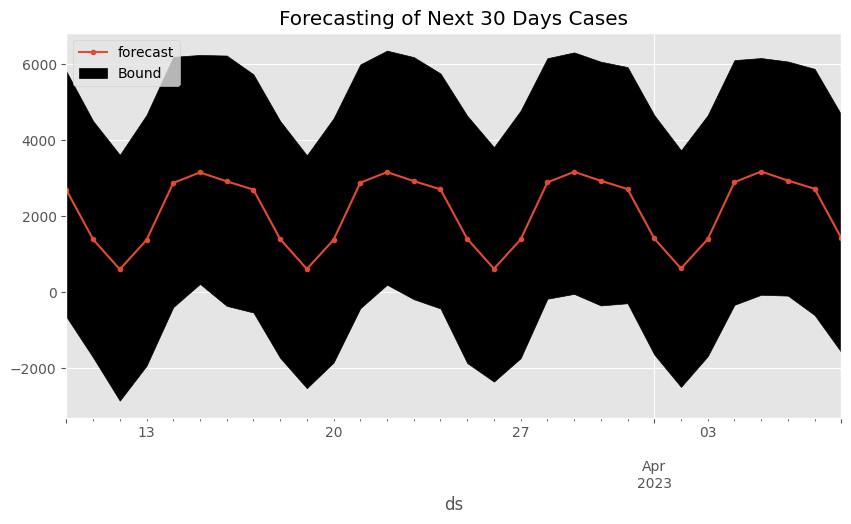

In [33]:
forecast["yhat"].plot(marker=".",figsize=(10,5))
plt.fill_between(x=forecast.index, y1=forecast["yhat_lower"], y2=forecast["yhat_upper"],color="black")
plt.legend(["forecast","Bound"],loc="upper left")
plt.title("Forecasting of Next 30 Days Cases")
plt.show()